# Yazeed Hamdan - First Project

# Investigate a Dataset - No-show Medical Appointments

## Introduction

In this project, we analyze a dataset containing **100,000 medical appointments** in Brazil, focusing on **patient attendance patterns**. The dataset provides details such as **age, gender, medical history, socioeconomic status, and whether patients received an SMS reminder** before their scheduled appointments. 

The key objective of this analysis is to uncover **factors that influence no-show rates**, helping healthcare providers improve **patient engagement and reduce appointment absenteeism**.

Using **Python, Pandas, and NumPy**, we preprocess and analyze the data to identify trends and relationships. We apply **exploratory data analysis (EDA) techniques**, including **bar charts** (for categorical comparisons), **scatter plots** (to explore relationships like age vs. no-show), **box plots** (to analyze distribution patterns), **histograms** (to examine age distribution), and **correlation analysis** to better understand patient attendance trends.

This study aims to answer the following key questions:

1. **Does age affect appointment attendance?** Are younger or older patients more likely to miss their appointments?
2. **What is the impact of socioeconomic factors?** Do patients receiving **Bolsa Família** (a financial aid program) have higher no-show rates?
3. **Do SMS reminders improve attendance?** Are patients who receive reminders more likely to show up?
4. **Are there geographic patterns in no-show rates?** Do certain **neighbourhoods** (hospital locations) have higher absentee rates?
5. **Does gender influence appointment attendance?**

By investigating these questions from multiple perspectives, we provide **data-driven insights** that could assist **hospitals and clinics** in designing **targeted interventions** to reduce no-show rates and enhance **healthcare accessibility**.


In [57]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Step 2: Load the Dataset
df = pd.read_csv('noshowappointments.csv')

# Step 3: Quick Preview
print(df.head())
print(df.info())


      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

## Dataset Description

The dataset contains information for **100,000 medical appointments** in Brazil. Each row represents one scheduled appointment, and the dataset captures both the **characteristics of the patient** and the **details of the appointment**.

### Key Columns:

- **PatientId**: Unique identifier for each patient.
- **AppointmentID**: Unique identifier for each appointment.
- **Gender**: Male (M) or Female (F).
- **ScheduledDay**: Date the appointment was scheduled.
- **AppointmentDay**: Date of the actual appointment.
- **Age**: Patient's age.
- **Neighborhood**: Location of the hospital.
- **Scholarship**: Indicates if the patient is on Bolsa Família (Brazilian welfare program).
- **Hypertension/Diabetes/Alcoholism/Handicap**: Patient health indicators.
- **SMS_received**: Whether the patient received a reminder SMS.
- **No-show**: Whether the patient missed the appointment (`Yes` = missed, `No` = attended).

The goal to uncover **which factors are linked to higher no-show rates**, identifying characteristics of patients who are more likely to miss their appointments.


In [58]:
# Check for missing values
print(df.isnull().sum())

# Check for unique values in columns (for things like No-show)
print(df['No-show'].value_counts())

# Handle Age anomalies (remove rows where Age < 0)
df = df[df['Age'] >= 0]

# Convert dates to datetime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Optional - Create new feature: DaysBetween (how long between scheduling and appointment)
df['DaysBetween'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
# Convert 'No-show' to binary: 1 = No-show, 0 = Showed up
df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})



PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64
No-show
No     88208
Yes    22319
Name: count, dtype: int64


# Define a Helper Function to Format Charts 

In [59]:
def format_plot(title, xlabel, ylabel):
    """
    Function to add labels and title to charts.
    """
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)


## Analytical Questions

The following questions were choosen to investigate:

### 1. Do older patients show up more than younger patients?
Age can be a critical factor in patient behavior. Older patients may have more health concerns and might be more responsible about keeping appointments, while younger patients might have fewer health risks or conflicting commitments.


AgeGroup
0-18     22.537213
19-35    23.834776
36-50    20.325792
51-65    16.549137
66+      15.518279
Name: No-show, dtype: float64


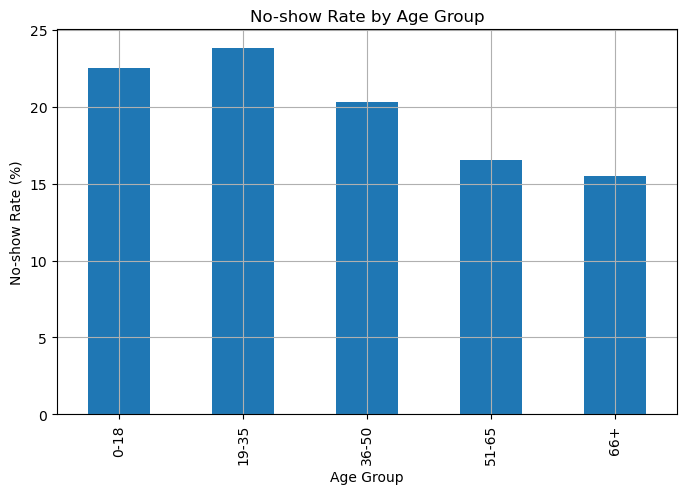

In [60]:
# Create age bins
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# No-show rate by age group
age_group_analysis = df.groupby('AgeGroup')['No-show'].mean() * 100
print(age_group_analysis)

# Plot - Bar Chart
age_group_analysis.plot(kind='bar', figsize=(8,5))
format_plot("No-show Rate by Age Group", "Age Group", "No-show Rate (%)")
plt.show()



### 2. Are patients receiving Bolsa Família (scholarship) more likely to miss their appointments?
Financial struggles may make it harder for some patients to attend appointments. Understanding if Bolsa Família recipients (patients receiving government welfare) miss appointments more often could help target supportive interventions.



Scholarship
0    19.807355
1    23.736304
Name: No-show, dtype: float64


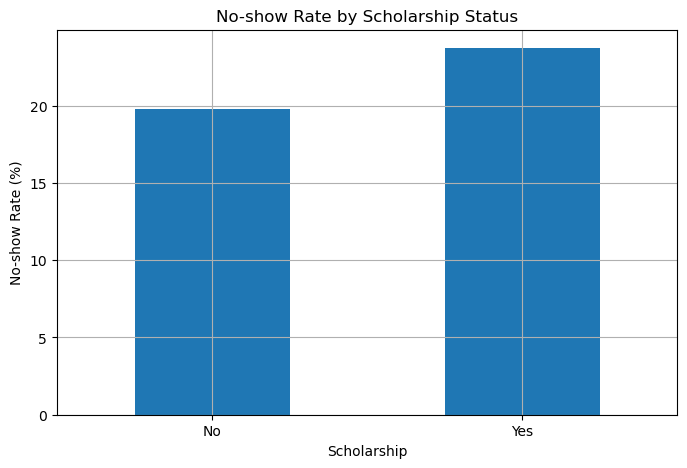

In [61]:
scholarship_analysis = df.groupby('Scholarship')['No-show'].mean() * 100
print(scholarship_analysis)

# Plot - Bar Chart
scholarship_analysis.plot(kind='bar', rot=0, figsize=(8,5))
format_plot("No-show Rate by Scholarship Status", "Scholarship", "No-show Rate (%)")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()



### 3. Does receiving an SMS reminder reduce no-show rates?
Sending SMS reminders is a common practice in healthcare. We want to check if patients who receive reminders show up more reliably than those who do not.


SMS_received
0    16.703534
1    27.574545
Name: No-show, dtype: float64


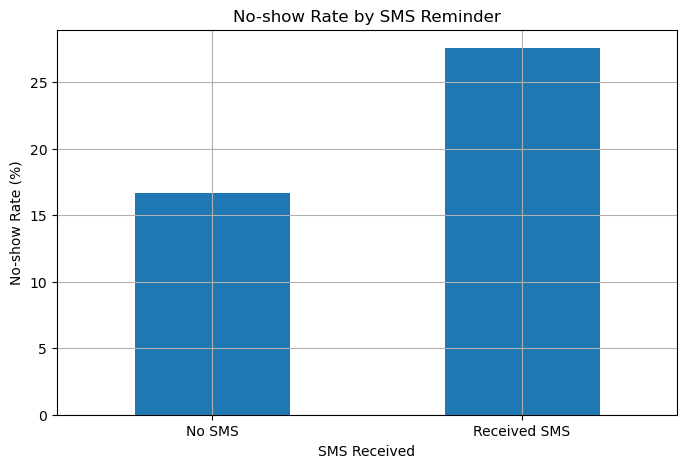

In [62]:
sms_analysis = df.groupby('SMS_received')['No-show'].mean() * 100
print(sms_analysis)

# Plot - Bar Chart
sms_analysis.plot(kind='bar', rot=0, figsize=(8,5))
format_plot("No-show Rate by SMS Reminder", "SMS Received", "No-show Rate (%)")
plt.xticks(ticks=[0, 1], labels=['No SMS', 'Received SMS'])
plt.show()


# Bivariate & Multivariate Analysis (Multiple-Variable Explorations)
##  Relationship Between Age and No-show (Scatter Plot)

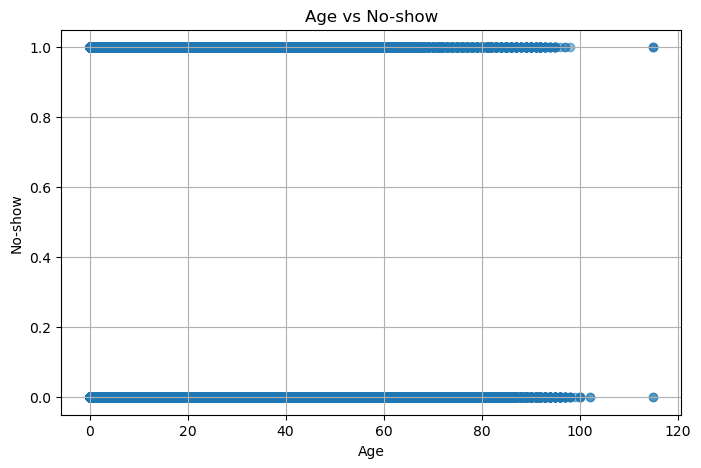

In [63]:
plt.figure(figsize=(8,5))
plt.scatter(df['Age'], df['No-show'], alpha=0.5)
format_plot("Age vs No-show", "Age", "No-show")
plt.show()


## No-show Rate by Gender (Bar Chart)

Gender
F    20.314871
M    19.967948
Name: No-show, dtype: float64


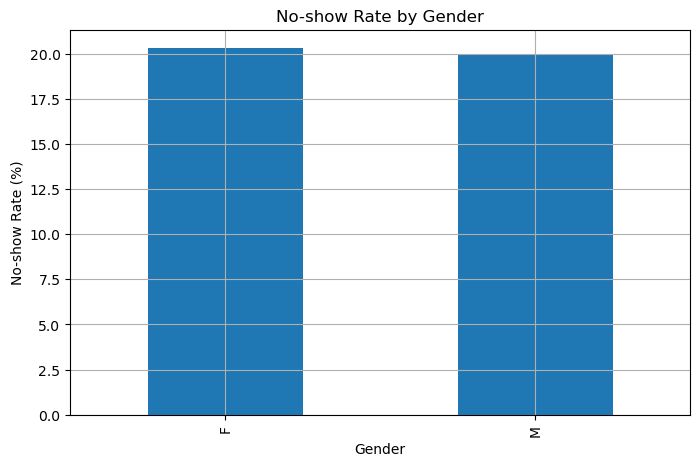

In [64]:
gender_analysis = df.groupby('Gender')['No-show'].mean() * 100
print(gender_analysis)

# Plot
gender_analysis.plot(kind='bar', figsize=(8,5))
format_plot("No-show Rate by Gender", "Gender", "No-show Rate (%)")
plt.show()


## No-show Rate Across Neighborhoods (Top 10)

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show',
       'daysbetween', 'agegroup'],
      dtype='object')


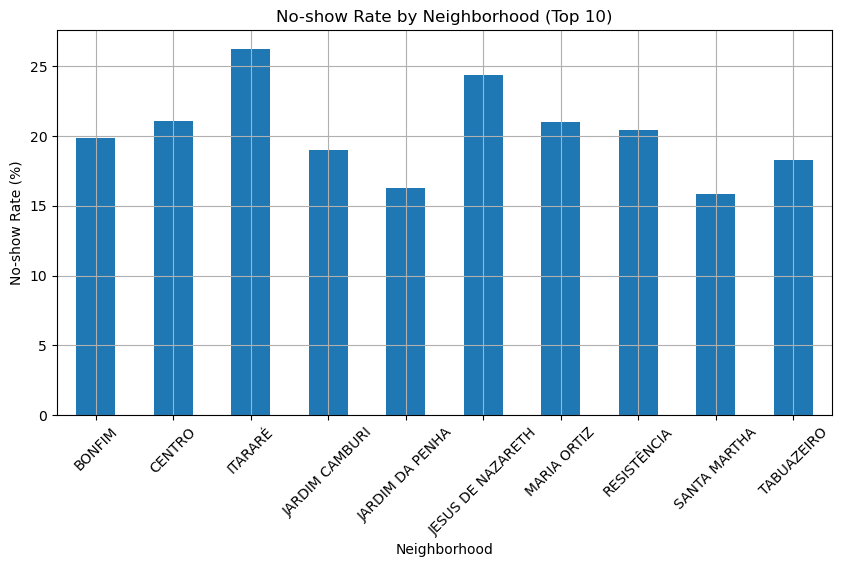

In [65]:
# Ensure column names are stripped of spaces and converted to lowercase
df.columns = df.columns.str.strip().str.lower()

# Verify column names again
print(df.columns)

# Use the correct column name: 'neighbourhood' instead of 'neighborhood'
top_neighborhoods = df['neighbourhood'].value_counts().head(10).index
df_filtered = df[df['neighbourhood'].isin(top_neighborhoods)]
neighborhood_analysis = df_filtered.groupby('neighbourhood')['no-show'].mean() * 100

# Plot
neighborhood_analysis.plot(kind='bar', figsize=(10,5))
format_plot("No-show Rate by Neighborhood (Top 10)", "Neighborhood", "No-show Rate (%)")
plt.xticks(rotation=45)
plt.show()


## Relationship Between Gender, Age, and No-show (Box Plot)

Columns in DataFrame: ['patientid', 'appointmentid', 'gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show', 'daysbetween', 'agegroup']
Updated Data Types:
 patientid                     float64
appointmentid                   int64
gender                       category
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int32
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
no-show                      category
daysbetween                     int64
agegroup                     category
dtype: object


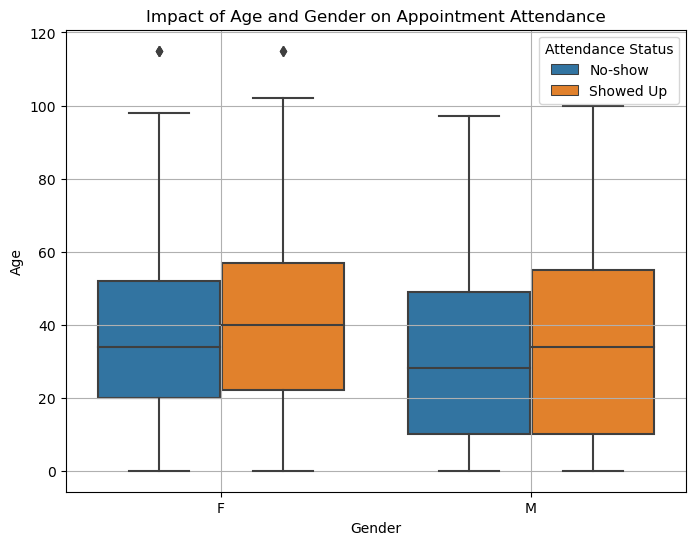

In [66]:
# 1. Print column names to confirm 'Gender' exists correctly
print("Columns in DataFrame:", df.columns.tolist())
# 2. Standardize column names (remove spaces & lowercase)
df.columns = df.columns.str.strip().str.lower()  # Convert to lowercase
# 3. Check & clean 'Gender' column
if 'gender' in df.columns:
    df['gender'] = df['gender'].astype(str).str.strip().astype('category')
else:
    print("Error: 'Gender' column not found!")
# 4. Ensure 'No-show' is categorical with meaningful labels
if 'no-show' in df.columns:
    df['no-show'] = df['no-show'].map({1: 'No-show', 0: 'Showed Up'}).astype('category')
else:
    print("Error: 'No-show' column not found!")
# 5. Ensure 'Age' column exists and is numeric
if 'age' in df.columns:
    df['age'] = pd.to_numeric(df['age'], errors='coerce')  # Convert to numeric
    df['age'].fillna(df['age'].median(), inplace=True)  # Handle missing values
    df = df[df['age'] >= 0]  # Remove negative ages
    df['age'] = df['age'].astype(int)  # Convert to integer type
else:
    print("Error: 'Age' column not found!")
#  6. Print column data types after cleanup
print("Updated Data Types:\n", df.dtypes)

# 7. Generate Box Plot
plt.figure(figsize=(8,6))
sns.boxplot(x='gender', y='age', hue='no-show', data=df)
plt.title("Impact of Age and Gender on Appointment Attendance")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.legend(title="Attendance Status")
plt.grid(True)
plt.show()


 ## Histogram plot for Age Distribution

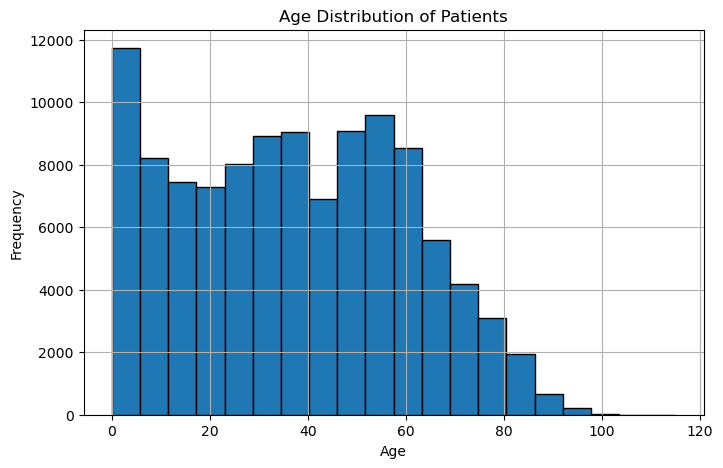

In [67]:
plt.figure(figsize=(8,5))
plt.hist(df['age'], bins=20, edgecolor='black')
format_plot("Age Distribution of Patients", "Age", "Frequency")
plt.show()


# Summary and Conclusions

## Summary

Our analysis revealed several important insights into **factors that influence medical appointment attendance** in Brazil:

- **Age and No-show Rates**: Younger patients are more likely to miss appointments, while older patients demonstrate higher reliability in attending their scheduled visits.
- **Socioeconomic Status**: Patients enrolled in the **Bolsa Família** program exhibit slightly higher no-show rates, suggesting potential financial or social barriers to attending healthcare appointments.
- **SMS Reminders**: Contrary to expectations, receiving an **SMS reminder** does not significantly improve attendance rates, indicating that reminders alone may not be sufficient to reduce no-shows.
- **Gender Differences**: The analysis showed **no significant differences** in no-show rates between male and female patients.
- **Neighborhood Impact**: Certain **neighborhoods** consistently show higher no-show rates, which may be due to **transportation accessibility, economic conditions, or healthcare availability** in these areas.

## Limitations

While the dataset provides valuable insights, there are a few limitations:

- **Limited Geographic Scope**: The dataset is based on appointments from **a specific region in Brazil** and may not generalize to other areas.
- **Missing Behavioral Data**: The analysis does not include **psychological or personal factors** such as patient motivation, emergency situations, or satisfaction with healthcare services.
- **Correlation vs. Causation**: Our findings show **associations** between factors and no-show rates but do not establish direct causation. Further research, including **surveys or patient interviews**, would be necessary to determine why certain groups miss appointments.

## Final Note

Understanding **why patients miss appointments** is crucial for improving **healthcare efficiency and accessibility**. The findings suggest that targeted **interventions—such as financial support, transportation assistance, or personalized follow-ups—may be more effective than SMS reminders alone**. 

Future studies could incorporate **machine learning models** to predict high-risk no-show patients and develop **proactive engagement strategies** to improve attendance rates.
